# **Основная информация:** 

* Cсылка на датасет:
https://www.kaggle.com/lodetomasi1995/income-classification?select=income_evaluation.csv 

* Есть разнородные признаки
* Есть несбалансированные классы
* Есть пропущенне значения

* N = 32561 (число объектов)
* d = 15 (количество признаков)
* K = 2 (классы)



# **Описание** 



1. **age** возраст
2. **workclass** рабочий класс
3. **fnlwgt** вес
4. **education** образование
5. **education-num** количество лет образования
6. **marital-status** семейное положение 1
7. **occupation** род деятельности
8. **relationship** семейное положение 2
9. **race** раса
10. **sex** пол
11. **capital-gain** прирост капитала
12. **capital-loss** потеря капитала
13. **hours-per-week** часы работы в неделю
14. **native-country** родная страна
15. **income** заработок 

Задача классификации состоит в определении зарабатывает человек меньше 50 000 или нет.


# **Чтение и вывод данных** 

In [ ]:
import pandas as pd
import seaborn as sea
import numpy as np

In [ ]:
data = pd.read_csv('data.csv')
data.shape

(32561, 15)

In [ ]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
data.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [ ]:
data.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
data.index

RangeIndex(start=0, stop=32561, step=1)

In [ ]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Колонка **fnlwgt** не представляет из себя важной информации и состоит из некорректных значений, а именно она должна отвечать за повторение объекта, но значения в ней слишком большие.

In [ ]:
data[' fnlwgt'].sum()

6179373392

Получили больше 6 миллиардов объектов (человек).  
Принимаем волевое решение удалить этот столбец.

In [ ]:
data = data.drop([' fnlwgt'], axis=1)

# **Визуализация** 

In [ ]:
sea.set(style = 'white', rc={'figure.figsize':(25, 5)})
colors = 'viridis'

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name:  workclass, dtype: int64

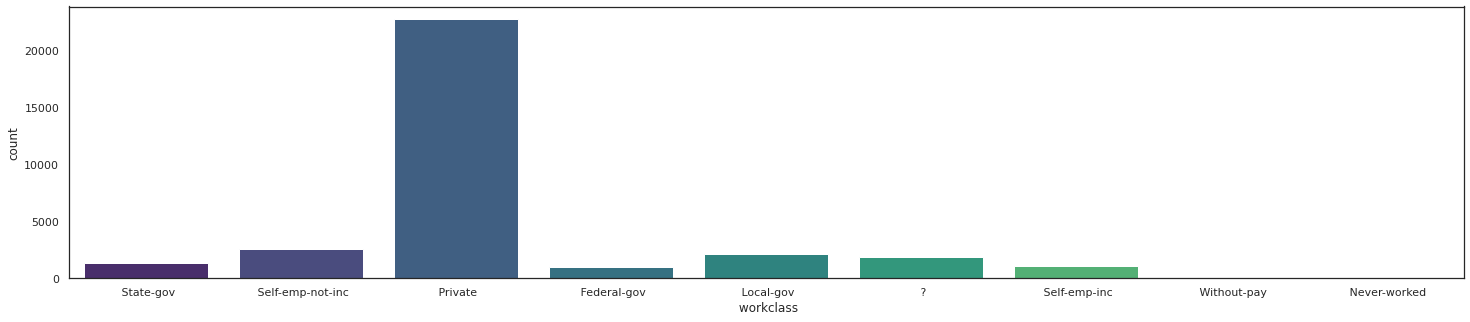

In [ ]:
sea.countplot(x=' workclass', data=data, palette = colors)
pass
data[' workclass'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name:  education, dtype: int64

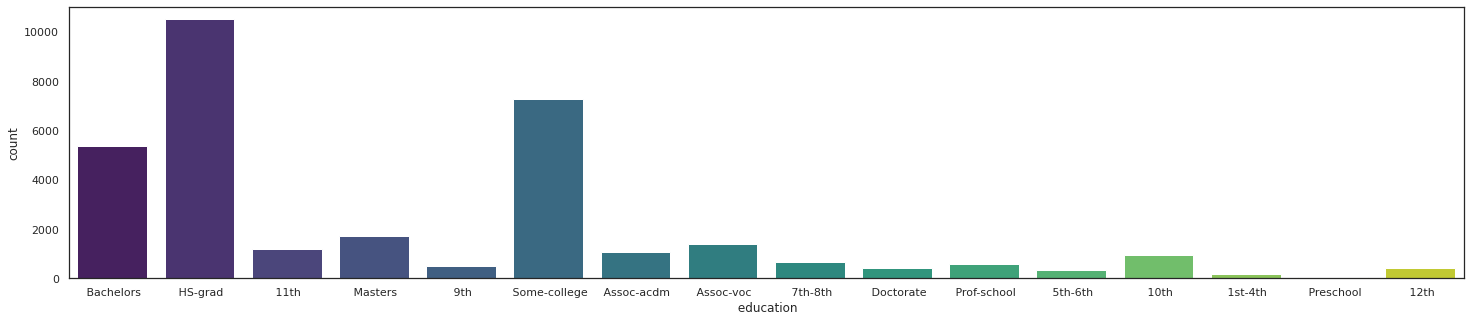

In [ ]:
sea.countplot(x=' education', data=data, palette = colors )
pass
data[' education'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name:  marital-status, dtype: int64

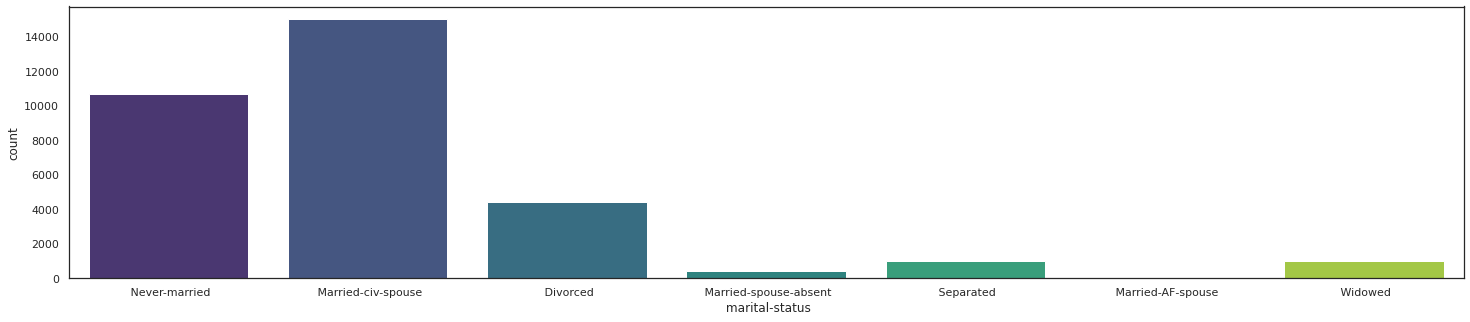

In [ ]:
sea.countplot(x=' marital-status', data=data,palette =colors)
pass
data[' marital-status'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name:  occupation, dtype: int64

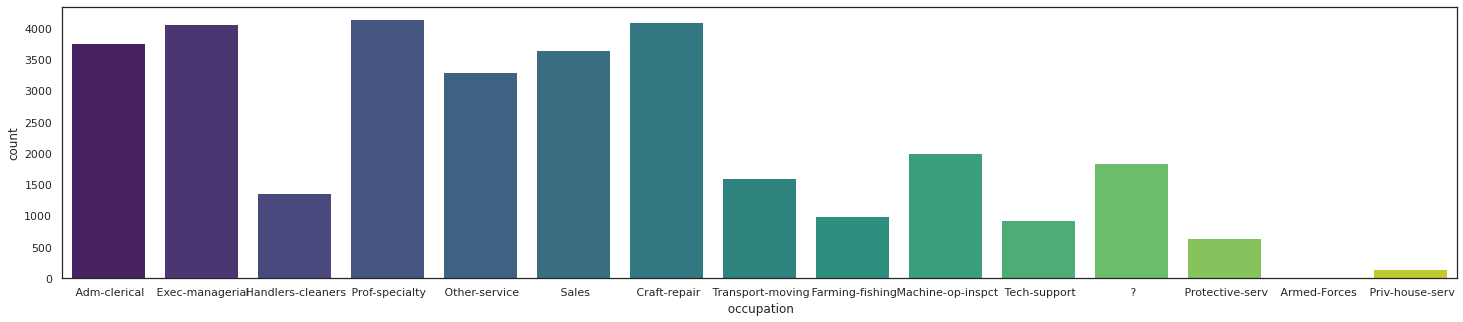

In [ ]:
sea.countplot(x=' occupation', data=data, palette = colors)
pass
data[' occupation'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name:  relationship, dtype: int64

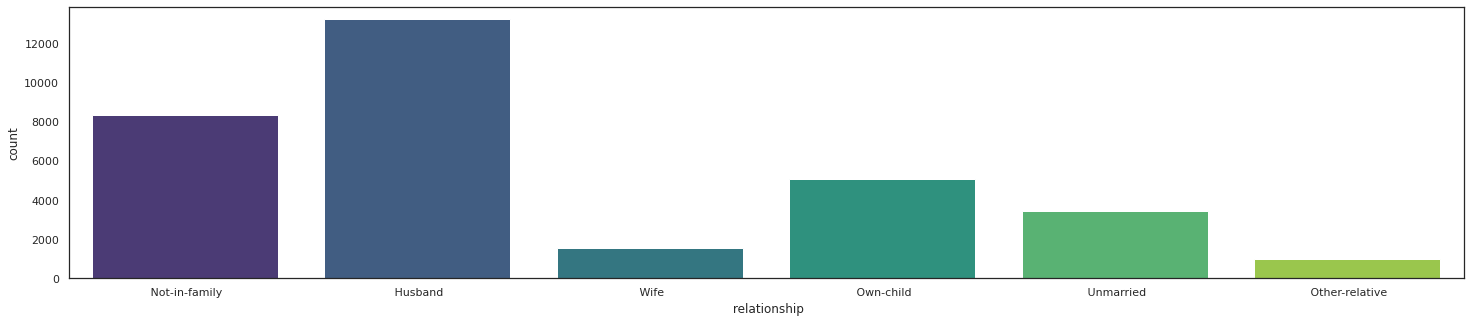

In [ ]:
sea.countplot(x=' relationship', data=data, palette = colors)
pass
data[' relationship'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name:  race, dtype: int64

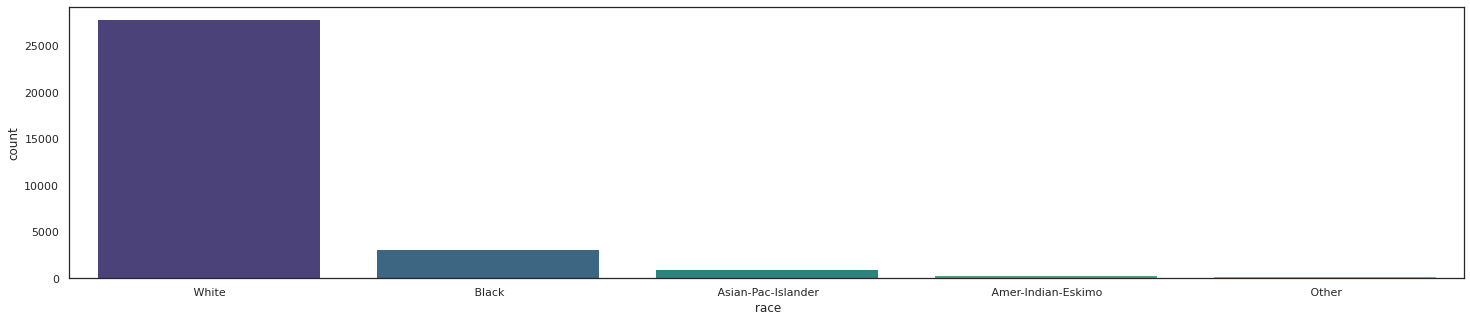

In [ ]:
sea.countplot(x=' race', data=data, palette = colors)
pass
data[' race'].value_counts()

 Male      21790
 Female    10771
Name:  sex, dtype: int64

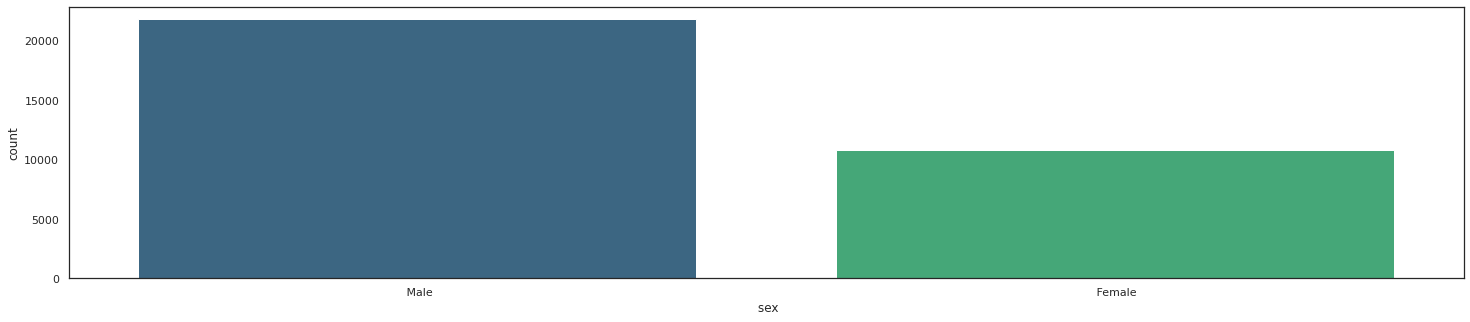

In [ ]:
sea.countplot(x=' sex', data=data, palette = colors)
pass
data[' sex'].value_counts()


In [ ]:
data[' native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

 <=50K    24720
 >50K      7841
Name:  income, dtype: int64

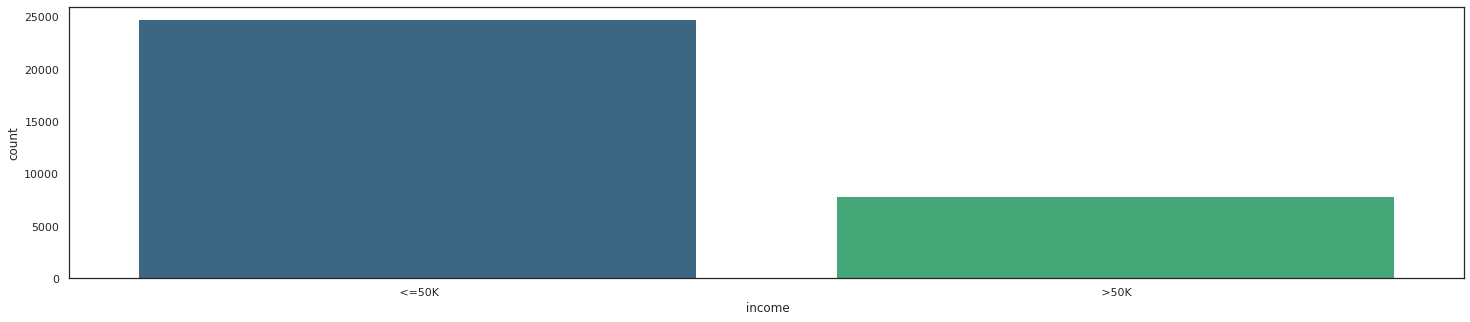

In [ ]:
sea.countplot(x=' income', data=data, palette = colors)
pass
data[' income'].value_counts()

In [ ]:
data.median()

age                37.0
 education-num     10.0
 capital-gain       0.0
 capital-loss       0.0
 hours-per-week    40.0
dtype: float64

In [ ]:
data.std()

age                  13.640433
 education-num        2.572720
 capital-gain      7385.292085
 capital-loss       402.960219
 hours-per-week      12.347429
dtype: float64

# **Cредний человек из датасета** 

В среднем человек из датасета:  
Мужчина 37 лет из США, который получил диплом средней школы,  окончил колледж,  
работает на частную компанию 40 часов в неделю. 

# **Обработка пропущенных значений** 

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name:  capital-gain, Length: 119, dtype: int64

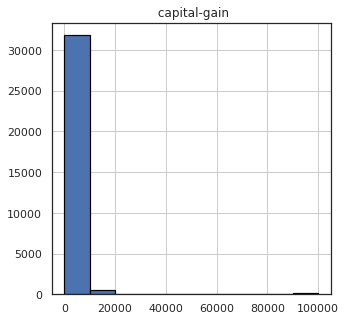

In [ ]:
data.hist(' capital-gain',  edgecolor='black', linewidth=1.2, figsize=(5, 5));
data[' capital-gain'].value_counts()


0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
1411        1
1539        1
2472        1
1944        1
2201        1
Name:  capital-loss, Length: 92, dtype: int64

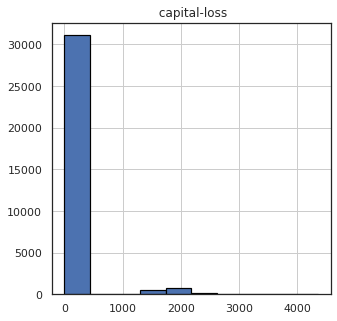

In [ ]:
data.hist(' capital-loss',  edgecolor='black', linewidth=1.2, figsize=(5, 5));
data[' capital-loss'].value_counts()

Видно, что практически все значения в колонках **capital-loss** и **capital-gain** равны нулю.  
Видимо, не все делились данными о заработке и убытке.  
Принимаем волевое решение о удалении этих колонок.

In [ ]:
data = data.drop(' capital-gain', 1)
data = data.drop(' capital-loss', 1)

Также было замеченно, что в колонках **occupation**, **workclass**, **native-country** присутсвует знак **?**  
Принимаем решение об замене на наиболее встречающиеся.

In [ ]:
data[' occupation'] = np.where(data[' occupation'] == ' ?', np.NaN, data[' occupation'])
data[' workclass'] = np.where(data[' workclass'] == ' ?', np.NaN, data[' workclass'])
data[' native-country'] = np.where(data[' native-country'] == ' ?', np.NaN, data[' native-country'])

In [ ]:
data.isna().sum()

age                   0
 workclass         1836
 education            0
 education-num        0
 marital-status       0
 occupation        1843
 relationship         0
 race                 0
 sex                  0
 hours-per-week       0
 native-country     583
 income               0
dtype: int64

In [ ]:
data[' occupation'].fillna(data[' occupation'].mode().iloc[0], inplace = True)

data[' workclass'].fillna(data[' workclass'].mode().iloc[0], inplace = True)

data[' native-country'].fillna(data[' native-country'].mode().iloc[0], inplace = True)


In [ ]:
data.isna().sum()

age                0
 workclass         0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

# **Диаграммы рассеивания для доходов** 

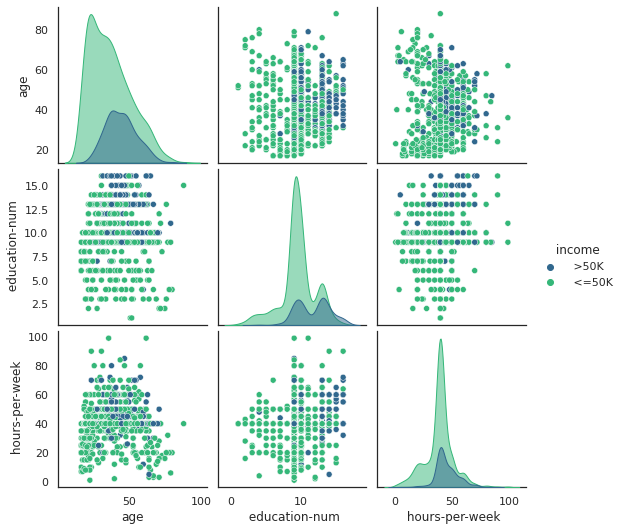

In [ ]:
np.random.seed(14)
random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace = False)
sea.pairplot(data.iloc[random_subset], diag_kind = 'auto', hue=' income', diag_kws={'alpha':0.5}, palette = colors)
pass

# **Зависемости** 

Обработаем бинарные признаки

In [ ]:
new_data = data.copy()
new_data[' income'] = pd.factorize(data[' income'])[0]
new_data[' sex'] = pd.factorize(data[' sex'])[0]

Построим карту зависемостей

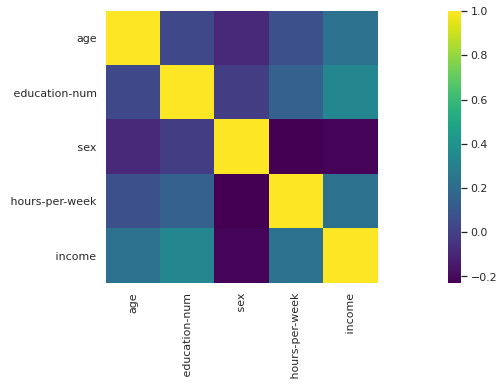

In [ ]:
sea.heatmap(new_data.corr(), square=True, cmap= colors)
pass

Видно, что больше всего вляет на заработок   
количество лет обучения, возраст и время работы.  
Пол человека совершенно не влияет.

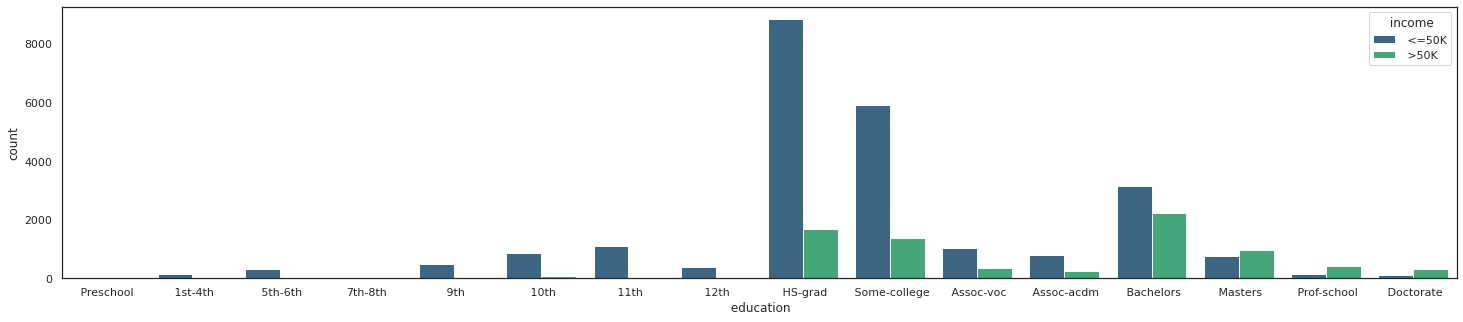

In [ ]:
sea.countplot(x=' education', order = [' Preschool',' 1st-4th',' 5th-6th',  '7th-8th',  ' 9th', ' 10th', 
                                                                        ' 11th', ' 12th', ' HS-grad', ' Some-college', ' Assoc-voc', ' Assoc-acdm', ' Bachelors', ' Masters', ' Prof-school', ' Doctorate'],         hue = ' income',  palette = colors, data = data)

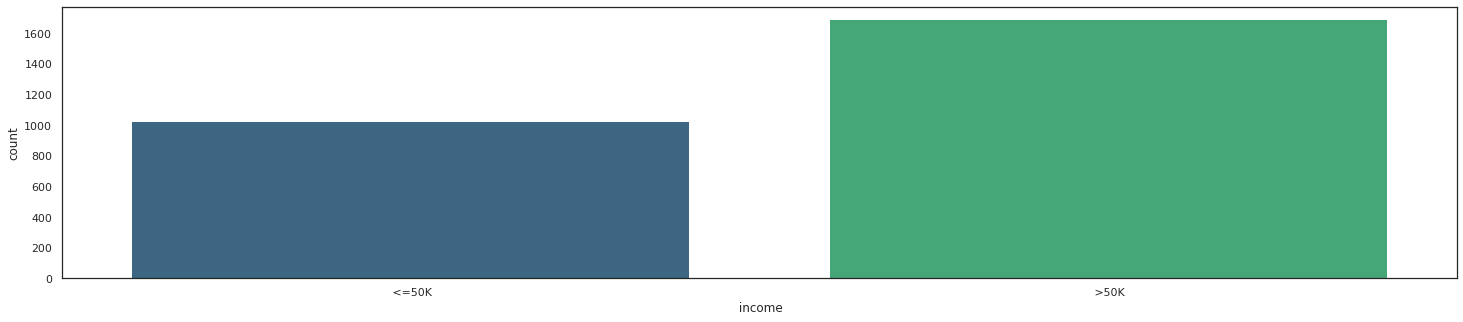

In [ ]:
filter = data[' education']. isin ([ ' Prof-school', ' Masters', ' Doctorate' ]) 
sea.countplot(x=' income', data=data[filter], palette = colors)
pass

In [ ]:
data[filter][' income'].value_counts()

 >50K     1688
 <=50K    1024
Name:  income, dtype: int64

Степень доктора наук или магистра, или  
наличие специального проффесионального образования  
больше всего влияет на зароботок > 50k (62%)  
Однако, учиться по этим направлениям придётся долше всего.  
Также очевидно, что количество лет обучения линейно зависит от степени обучения.

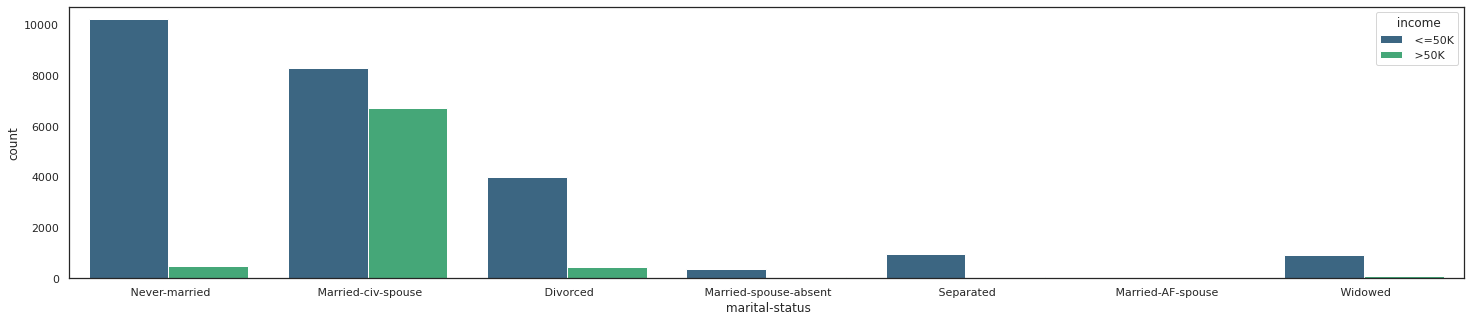

In [ ]:
sea.countplot(x=' marital-status', hue = ' income',  palette = colors, data = data)

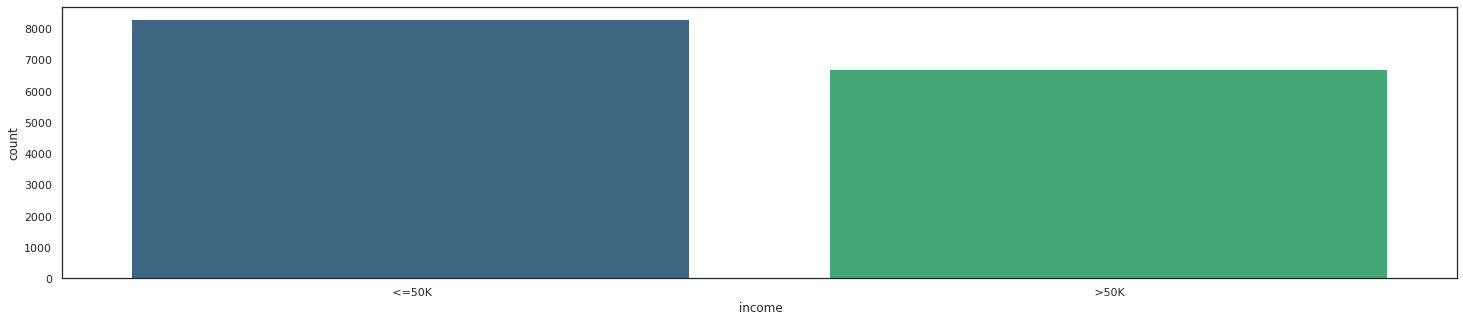

In [ ]:
filter = data[' marital-status']. isin ([ ' Married-civ-spouse' ]) 
sea.countplot(x=' income', data=data[filter], palette = colors)

In [ ]:
data[filter][' income'].value_counts()

 <=50K    8284
 >50K     6692
Name:  income, dtype: int64

Если вы женаты или вышли замуж, то с вероятностью 45% будете зарабатывать > 50k


# **Графики распределения**

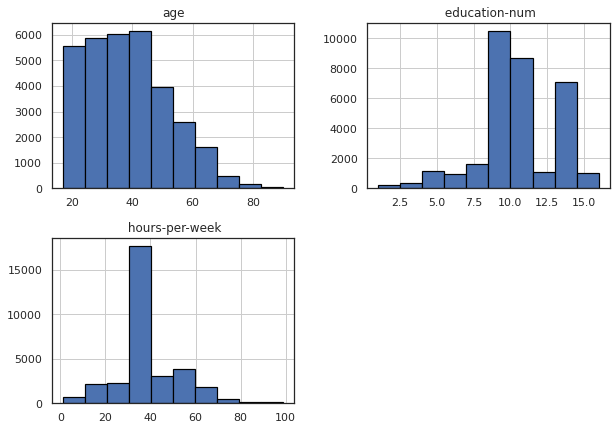

In [ ]:
data.hist(edgecolor='black', linewidth=1.2, figsize=(10, 7));

# **Обработка категориальных признаков**

In [ ]:
data.describe(include=['object'])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,24532,10501,14976,5983,13193,27816,21790,29753,24720


In [ ]:
workclass = pd.get_dummies(data[' workclass'])
workclass.head

<bound method NDFrame.head of         Federal-gov   Local-gov  ...   State-gov   Without-pay
0                 0           0  ...           1             0
1                 0           0  ...           0             0
2                 0           0  ...           0             0
3                 0           0  ...           0             0
4                 0           0  ...           0             0
...             ...         ...  ...         ...           ...
32556             0           0  ...           0             0
32557             0           0  ...           0             0
32558             0           0  ...           0             0
32559             0           0  ...           0             0
32560             0           0  ...           0             0

[32561 rows x 8 columns]>

In [ ]:
data = pd.concat((data, workclass), axis=1)
data = data.drop([' workclass'],  axis=1)

In [ ]:
education	= pd.get_dummies(data[' education'])
data = pd.concat((data, education), axis=1)
data = data.drop([' education'],  axis=1)

In [ ]:
marital_status	= pd.get_dummies(data[' marital-status'])
data = pd.concat((data, marital_status), axis=1)
data = data.drop([' marital-status'],  axis=1)

In [ ]:
occupation	= pd.get_dummies(data[' occupation'])
data = pd.concat((data, occupation), axis=1)
data = data.drop([' occupation'],  axis=1)

In [ ]:
relationship		= pd.get_dummies(data[' relationship'])
data = pd.concat((data, relationship), axis=1)
data = data.drop([' relationship'],  axis=1)

In [ ]:
race		= pd.get_dummies(data[' race'])
data = pd.concat((data, race), axis=1)
data = data.drop([' race'],  axis=1)

In [ ]:
native_country = pd.get_dummies(data[' native-country'])
data = pd.concat((data, native_country), axis=1)
data = data.drop([' native-country'],  axis=1)

In [ ]:
data[' income'] = pd.factorize(data[' income'])[0]

In [ ]:
data[' sex'] = pd.factorize(data[' sex'])[0]

In [ ]:
data.shape

(32561, 102)

Перешли  к бинарным признакам

# **Подготовка данных**

In [ ]:
Y = data[[' income']]
X = data.drop([' income'], axis=1)
print("x:", X.shape)
print("y:", Y.shape)

x: (32561, 101)
y: (32561, 1)


# **Усреднение**

In [ ]:
X = (X - X.min())/(X.max() - X.min() )

In [ ]:
X

,age,education-num,sex,hours-per-week,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,...,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Holand-Netherlands,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,0.301370,0.800000,0.0,0.397959,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.452055,0.800000,0.0,0.122449,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.287671,0.533333,0.0,0.397959,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.493151,0.400000,0.0,0.397959,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.150685,0.800000,1.0,0.397959,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,0.733333,1.0,0.377551,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32557,0.315068,0.533333,0.0,0.397959,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32558,0.561644,0.533333,1.0,0.397959,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32559,0.068493,0.533333,0.0,0.193878,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# **Обучающая и тестовая выборка**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1998)
print("x_train: ", x_train.shape)
print("x_test ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

x_train:  (26048, 101)
x_test  (6513, 101)
y_train:  (26048, 1)
y_test:  (6513, 1)


# **Классификатор ближайщих соседей**

In [ ]:
acc = pd.DataFrame({'n':[],'train':[],'test':[]})

for i in range(1, 15, 3):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train.values.ravel())
    acc  = acc.append({'n':i,'train':knn.score(x_train, y_train),
                                 'test':knn.score(x_test, y_test)},ignore_index=True)

print(acc)

      n     train      test
0   1.0  0.963721  0.793797
1   4.0  0.870278  0.820820
2   7.0  0.860795  0.833717
3  10.0  0.852503  0.838170
4  13.0  0.849739  0.833564


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train, y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

[[0.92854235 0.07145765]
 [0.43910056 0.56089944]]


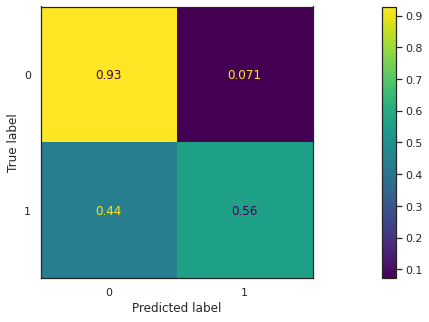

In [ ]:
plot_confusion_matrix(knn, x_test, y_test, normalize='true')
print(confusion_matrix(y_test, knn.predict(x_test), normalize='true'))
pass

Видно, что классификатор неплохо предсказывает, что человек не имеет доход больше 50к,  
однако, вероятность того, что предсказание о том, что у человека доход больше 50к,  
будет практически равносильно броску монеты.  


# **Борьба с несбалансированностью**

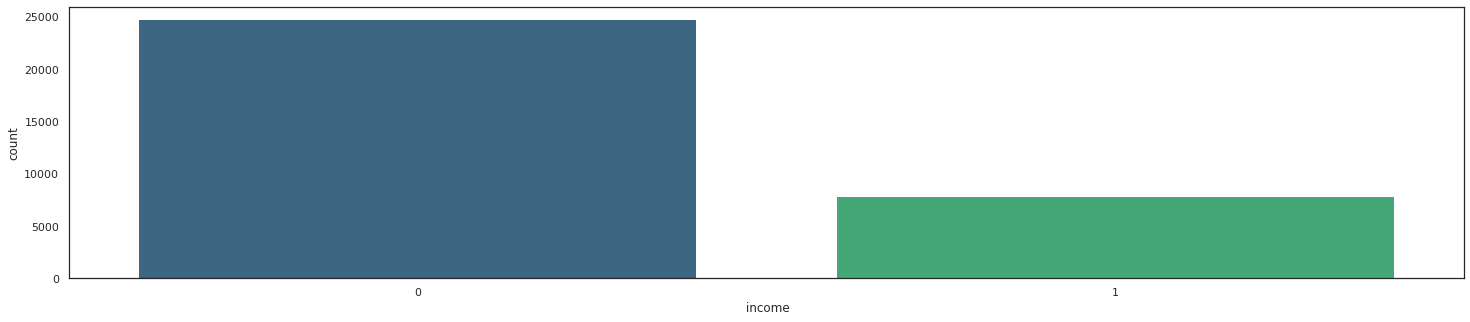

In [ ]:
sea.countplot(x = ' income', data = Y, palette = colors)
pass

In [ ]:
x_b, y_b = SMOTE().fit_sample(x_train, y_train.values.ravel())
x_b = pd.DataFrame(x_b)
y_b = pd.DataFrame(y_b)
print("x extended :", x_b.shape)
print("y extended :", y_b.shape)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


x extended : (39616, 101)
y extended : (39616, 1)


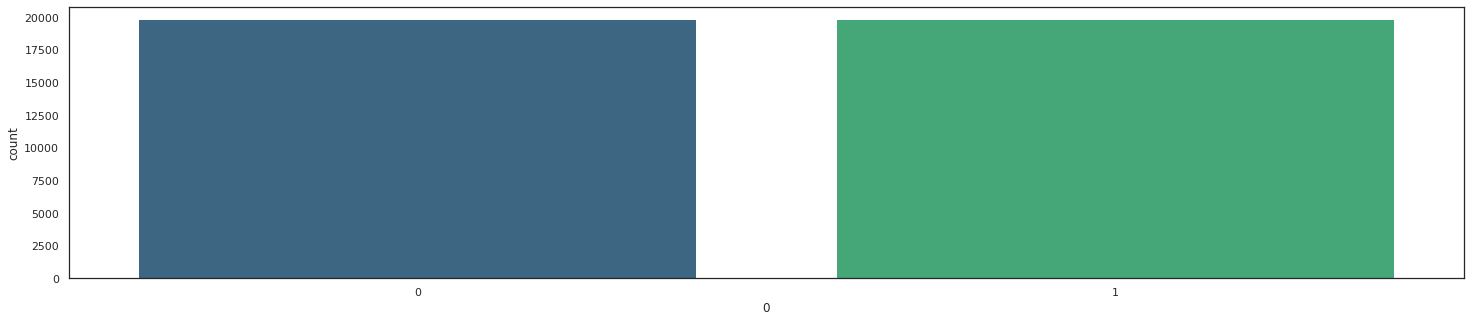

In [ ]:
sea.countplot(x = 0, data = y_b, palette = colors)
pass

In [ ]:
acc_b = pd.DataFrame({'n':[],'train':[],'test':[]})

knn_b = KNeighborsClassifier(n_neighbors = 10)
knn_b.fit(x_b, y_b.values.ravel())
acc_b  = acc_b.append({'n':10,'train':knn_b.score(x_b, y_b),
                                 'test':knn_b.score(x_test, y_test)},ignore_index=True)
print(acc_b)

      n     train      test
0  10.0  0.849833  0.782435


[[0.77809446 0.22190554]
 [0.20424735 0.79575265]]


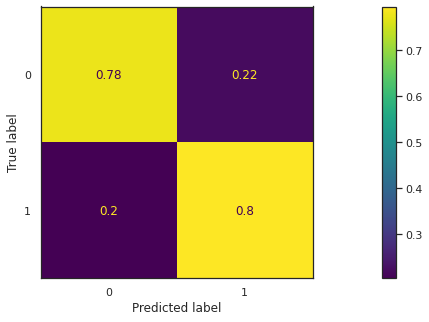

In [ ]:
plot_confusion_matrix(knn_b, x_test, y_test, normalize='true')
print(confusion_matrix(y_test, knn_b.predict(x_test), normalize='true'))
pass

Видно, что повысилась точность предсказания заработка > 50k,  
но понизилось точность предсказания заработка <= 50k,

# **PCA**

In [ ]:
import matplotlib.pyplot as plt

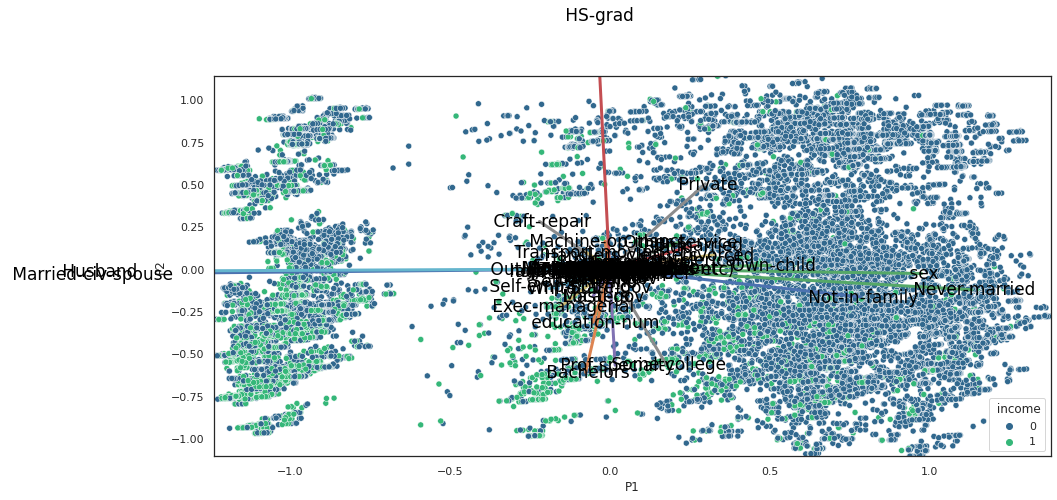

In [ ]:
def biplot(X,y, comp, labels):
    plt.figure(figsize=(15,7))
    draw = pd.concat([X, y], axis=1, join='inner')
    sea.scatterplot(data = draw, x = 'P1',y ='P2', hue=' income',alpha=1.0, 
                    palette= colors)
    plt.ylim(bottom = X["P2"].min(), top = X["P2"].max())
    plt.xlim(left = X["P1"].min(), right =X["P1"].max())
    for i in range(0,len(comp[0])):
        plt.text(comp[0,i]*3, comp[1,i]*2, labels[i], color = 'black', ha = 'center', va = 'center',  fontsize=17)
        plt.plot( [0, comp[0,i]*3], [0, comp[1,i]*2], linewidth = 3)
        
        
pca = PCA(n_components = 2)


pca_x = pca.fit_transform(X)
pca_x = pd.DataFrame(pca_x, columns = ['P1','P2'])

biplot(pca_x, Y, pca.components_, X.columns)

Важные признаки:
* семейное положение 
* образование 





      n     train      test
0   1.0  0.963606  0.777982
1   4.0  0.865709  0.810072
2   7.0  0.853501  0.820820
3  10.0  0.846361  0.825580
4  13.0  0.841984  0.828190
[[0.91245928 0.08754072]
 [0.43035603 0.56964397]]


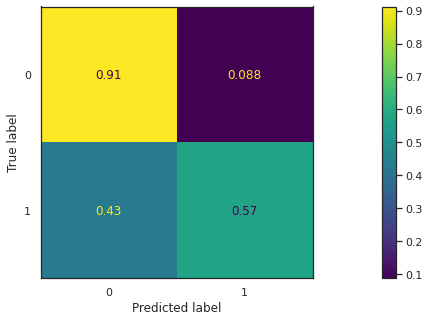

In [ ]:
acc_2 = pd.DataFrame({'n':[],'train':[],'test':[]})
x_train, x_test, y_train, y_test = train_test_split(pca_x, Y, test_size = 0.2, random_state = 1998)
for i in range(1, 15, 3):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train.values.ravel())
    acc_2  = acc_2.append({'n':i,'train':knn.score(x_train, y_train),
                                 'test':knn.score(x_test, y_test)},ignore_index=True)

print(acc_2)
plot_confusion_matrix(knn, x_test, y_test, normalize='true')
print(confusion_matrix(y_test, knn.predict(x_test),normalize='true'))

In [ ]:
acc_pca = pd.DataFrame({'n':[],'train':[],'test':[], "true_>50":[]})
for i in range(1, 32, 2):
    pca = PCA(n_components=i)
    pca_x = pca.fit_transform(X)
    x_train, x_test, y_train, y_test = train_test_split(pca_x, Y, test_size = 0.2, random_state = 1998) 
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train.values.ravel())
    acc_pca  = acc_pca.append({'n':i,'train':knn.score(x_train, y_train),
                               'test':knn.score(x_test, y_test),
                               "true_>50":confusion_matrix(y_test, knn.predict(x_test),normalize='true')[1,1]},ignore_index=True)

print(acc_pca)

       n     train      test  true_>50
0    1.0  0.963990  0.728082  0.452217
1    3.0  0.884713  0.815139  0.566521
2    5.0  0.866554  0.822969  0.577764
3    7.0  0.858838  0.826654  0.582761
4    9.0  0.853002  0.828957  0.582136
5   11.0  0.849777  0.830800  0.582136
6   13.0  0.847013  0.829879  0.574641
7   15.0  0.844671  0.837402  0.588382
8   17.0  0.841178  0.835713  0.572142
9   19.0  0.840832  0.832028  0.563398
10  21.0  0.838260  0.831875  0.581512
11  23.0  0.838951  0.833103  0.567146
12  25.0  0.838759  0.834024  0.577139
13  27.0  0.837876  0.831568  0.570269
14  29.0  0.837416  0.829879  0.563398
15  31.0  0.837108  0.831875  0.568395


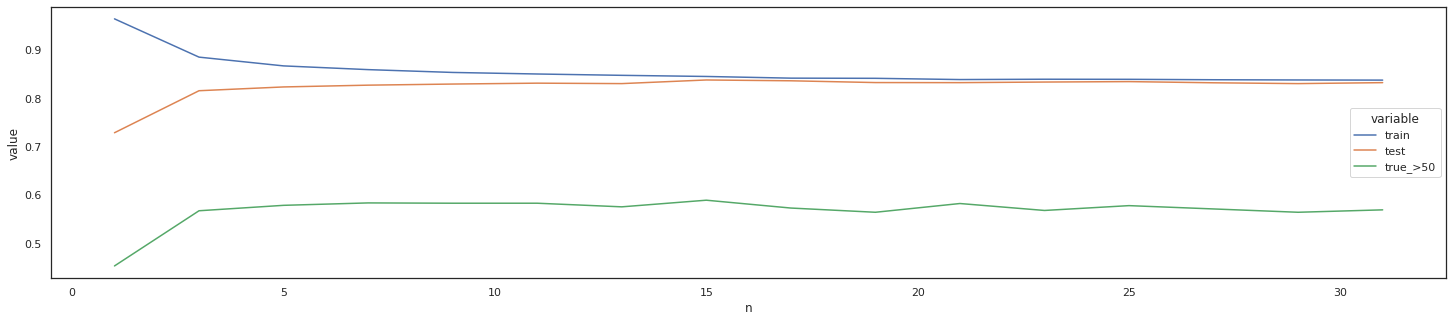

In [ ]:
sea.lineplot(x='n', y='value', hue='variable', data=pd.melt(acc_pca, ['n']))
pass

# **LDA**

In [ ]:
lda = LinearDiscriminantAnalysis(n_components = 1)
lda_x = lda.fit_transform(X, Y.values.ravel())
x_train, x_test, y_train, y_test = train_test_split(lda_x, Y, test_size = 0.2, random_state = 1998) 

Train: 0.8454775798525799
Test: 0.8249654537079687
[[0.935057  0.064943 ]
 [0.5128045 0.4871955]]


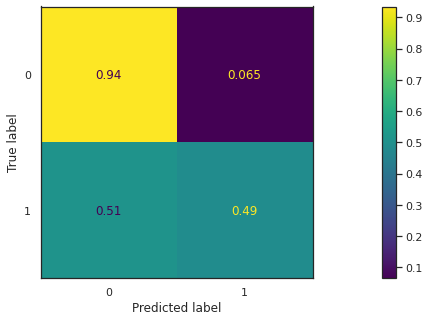

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train, y_train.values.ravel())
print("Train:", knn.score(x_train, y_train))
print("Test:", knn.score(x_test, y_test))
plot_confusion_matrix(knn, x_test, y_test, normalize='true')
print(confusion_matrix(y_test, knn.predict(x_test),normalize='true'))

Уменьшение размерности задачи до одной компоненты незначительно (5%) повлияло на предсказания.

# **Выводы**

* Лучше всего себя показал классификатор ближащих соседей с параметром 10
* Правильность предсказания, что доход будет >50K, низкая из-за несбалансированности классов 
* Уменьшение параметров с помощью PCA и LDA  
незначительно влияет на предсказания, однако ускоряет работу алгоритмов. 
* Важными признаками, вдоль которых идёт наибольший разброс, оказались образование и семейное положение.


